Dataset: 120 Years of Olympic History: athletes and results 

---


Link: https://www.kaggle.com/heesoo37/120-years-of-olympic-history-athletes-and-results


1.  Have the same countries consistently won the most medals? (plot over time in line graph)  
> Have the same countries consistently won in certain sports?


2. What percent of gold medals each country won in 1896, 1948 and 2016? (plot in pie chart)

3.  What percent of total medals each country won in 1896, 1948 and 2016? (plot in pie chart)

4.  What variables are significant in whether or not an athlete medals? Gets a gold medal or not? Get any medal or none?
> See what variables are significant in each of the individual sports.


5. Who has won the most Olympic medals for males and females?
> Who has won the most gold, silver and bronze medals?


In [ ]:
import pandas as pd 
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt 
from google.colab import files 
from datetime import datetime 

## Read in and see data tables

In [ ]:
#found the original source for the data from Github (through Kaggle)
athlete_dat = pd.read_csv('https://github.com/rgriff23/Olympic_history/raw/master/data/athlete_events.csv')
noc_dat = pd.read_csv('https://raw.githubusercontent.com/rgriff23/Olympic_history/master/data/noc_regions.csv')

athlete_dat.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN


In [ ]:
noc_dat.head(3)

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN


In [ ]:
#merge the two data sets into a single dataframe, df

df = pd.merge(athlete_dat, noc_dat, on='NOC', how='left')
df.head(3)


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN


# Question 1

In [ ]:
mby=df[['Year','region']]
mby.dropna()
mby=mby.sort_values(by=['Year'])
mby.rename(columns={'region':'Country'}, inplace=True)

In [ ]:
mby.head(3)

,Year,Country
214333,1896,Germany
244717,1896,France
244716,1896,France


In [ ]:
countries1 = df.region.unique()
countries=np.ndarray.tolist(countries1)
regtotal = list(df.region)
regtotal
#countries

['China',
 'China',
 'Denmark',
 'Denmark',
 'Netherlands',
 'Netherlands',
 'Netherlands',
 'Netherlands',
 'Netherlands',
 'Netherlands',
 'USA',
 'USA',
 'USA',
 'USA',
 'USA',
 'USA',
 'USA',
 'USA',
 'USA',
 'USA',
 'USA',
 'USA',
 'USA',
 'USA',
 'USA',
 'USA',
 'Netherlands',
 'Netherlands',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Finland',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Romania',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Norway',
 'Nether

# # Question 2

In [ ]:
goldMedals = df[(df.Medal == 'Gold')]
goldMedals.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
60,20,Kjetil Andr Aamodt,M,20.0,176.0,85.0,Norway,NOR,1992 Winter,1992,Winter,Albertville,Alpine Skiing,Alpine Skiing Men's Super G,Gold,Norway,NaN


In [ ]:

goldMedals_1896 = goldMedals[goldMedals['Year'] == 1896]
goldMedals_1896.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
7498,4189,Nikolaos Andriakopoulos,M,NaN,NaN,NaN,Greece,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Rope Climbing,Gold,Greece,NaN
23914,12563,Conrad Helmut Fritz Bcker,M,25.0,NaN,NaN,Germany,GER,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Parallel Bars, Teams",Gold,Germany,NaN
23916,12563,Conrad Helmut Fritz Bcker,M,25.0,NaN,NaN,Germany,GER,1896 Summer,1896,Summer,Athina,Gymnastics,"Gymnastics Men's Horizontal Bar, Teams",Gold,Germany,NaN
24682,12929,John Mary Pius Boland,M,25.0,NaN,NaN,Great Britain,GBR,1896 Summer,1896,Summer,Athina,Tennis,Tennis Men's Singles,Gold,UK,NaN
24683,12929,John Mary Pius Boland,M,25.0,NaN,NaN,Great Britain/Germany,GBR,1896 Summer,1896,Summer,Athina,Tennis,Tennis Men's Doubles,Gold,UK,NaN


In [ ]:
df1896 = goldMedals_1896.groupby('region')['Medal'].count().sort_values(ascending=False).reset_index(name='Total Gold')

df1896


,region,Total Gold
0,Germany,25
1,USA,11
2,Greece,10
3,France,5
4,UK,3
5,Hungary,2
6,Austria,2
7,Australia,2
8,Switzerland,1
9,Denmark,1


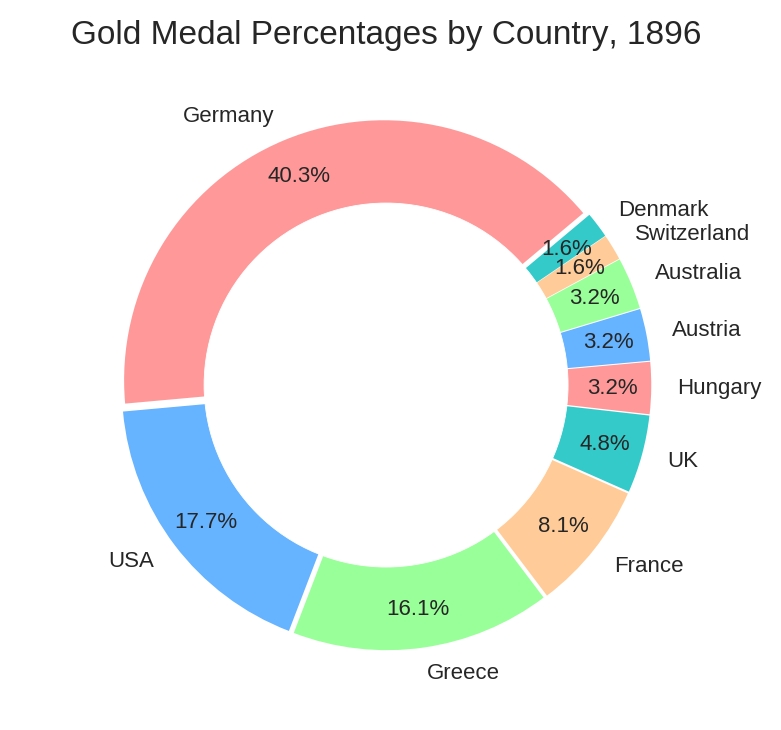

In [ ]:
fig = plt.figure(figsize=(4,4), dpi=200)
ax1 = plt.subplot(111)

labels = list(df1896['region'])
explode = [0.02 for item in labels] 
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#34caca']

df1896['Total Gold'].plot(kind='pie', explode = explode, labels = labels, colors = colors, autopct='%1.1f%%', startangle=40, fontsize=8, pctdistance=0.85)

centre_circle = plt.Circle((0,0),0.7,color='white', fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.set_title("Gold Medal Percentages by Country, 1896")

ax1.axis('off')
plt.tight_layout()
plt.show()


In [ ]:

goldMedals_1948 = goldMedals[goldMedals['Year'] == 1948]
goldMedals_1948.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
44,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Horse Vault,Gold,Finland,NaN
48,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Pommelled Horse,Gold,Finland,NaN
1375,777,Pierre Louis Eugne Adam,M,24.0,NaN,NaN,France,FRA,1948 Summer,1948,Summer,London,Cycling,"Cycling Men's Team Pursuit, 4,000 metres",Gold,France,NaN
2410,1350,George Lewis Ahlgren,M,19.0,NaN,NaN,United States,USA,1948 Summer,1948,Summer,London,Rowing,Rowing Men's Coxed Eights,Gold,USA,NaN


In [ ]:
df1948 = goldMedals_1948.groupby('region')['Medal'].count().sort_values(ascending=False).reset_index(name='Total Gold')

df1948.head(6)


,region,Total Gold
0,USA,93
1,Sweden,37
2,France,28
3,Italy,22
4,India,20
5,Finland,18


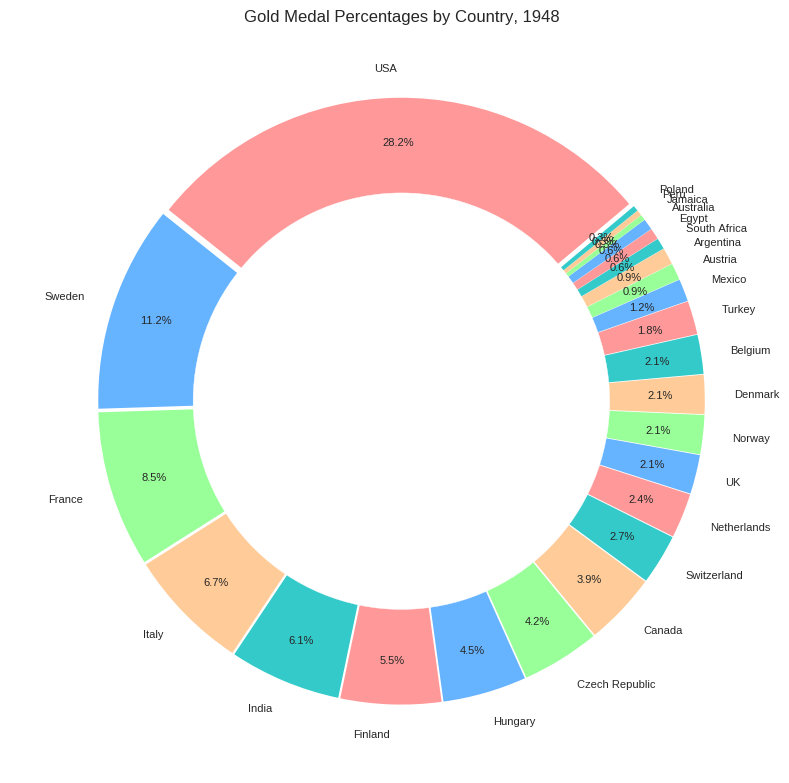

In [ ]:
fig = plt.figure(figsize=(8,8), dpi=100)
ax1 = plt.subplot(111)

labels = list(df1948['region'])
explode = [0.02 for item in labels] 
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#34caca']

df1948['Total Gold'].plot(kind='pie', explode = explode, labels = labels, colors = colors, autopct='%1.1f%%', startangle=40, fontsize=8, pctdistance=0.85)

centre_circle = plt.Circle((0,0),0.7,color='white', fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.set_title("Gold Medal Percentages by Country, 1948")

ax1.axis('off')
plt.tight_layout()
plt.show()


In [ ]:

goldMedals_2016 = goldMedals[goldMedals['Year'] == 2016]
goldMedals_2016.head()


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
1080,608,Ahmad Abughaush,M,20.0,178.0,68.0,Jordan,JOR,2016 Summer,2016,Summer,Rio de Janeiro,Taekwondo,Taekwondo Men's Featherweight,Gold,Jordan,NaN
1495,832,Nicola Virginia Adams,F,33.0,164.0,51.0,Great Britain,GBR,2016 Summer,2016,Summer,Rio de Janeiro,Boxing,Boxing Women's Flyweight,Gold,UK,NaN
1849,1017,Nathan Ghar-Jun Adrian,M,27.0,198.0,100.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 100 metres Freestyle Relay,Gold,USA,NaN
1850,1017,Nathan Ghar-Jun Adrian,M,27.0,198.0,100.0,United States,USA,2016 Summer,2016,Summer,Rio de Janeiro,Swimming,Swimming Men's 4 x 100 metres Medley Relay,Gold,USA,NaN
2453,1374,Tontowi Ahmad,M,29.0,179.0,72.0,Indonesia-1,INA,2016 Summer,2016,Summer,Rio de Janeiro,Badminton,Badminton Mixed Doubles,Gold,Indonesia,NaN


In [ ]:
df2016 = goldMedals_2016.groupby('region')['Medal'].count().sort_values(ascending=False).reset_index(name='Total Gold')

df2016.head(6)


,region,Total Gold
0,USA,139
1,UK,64
2,Russia,52
3,Germany,49
4,China,46
5,Brazil,36


In [ ]:
df2016['Percent'] = round(100*df2016['Total Gold']/(df2016['Total Gold'].sum()), 2)

df2016.head(3)

,region,Total Gold,Percent
0,USA,139,20.93
1,UK,64,9.64
2,Russia,52,7.83


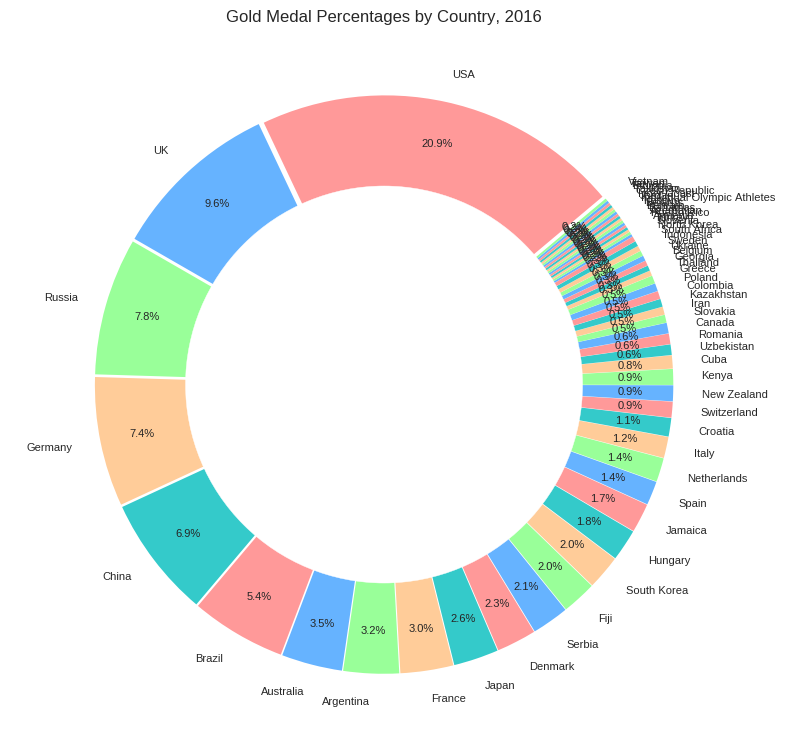

In [ ]:
fig = plt.figure(figsize=(8,8), dpi=100)
ax1 = plt.subplot(111)

labels = list(df2016['region'])
explode = [0.02 for item in labels] 
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#34caca']

df2016['Total Gold'].plot(kind='pie', explode = explode, labels = labels, colors = colors, autopct='%1.1f%%', startangle=40, fontsize=8, pctdistance=0.85)

centre_circle = plt.Circle((0,0),0.7,color='white', fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.set_title("Gold Medal Percentages by Country, 2016")

ax1.axis('off')
plt.tight_layout()
plt.show()


## Question 3

In [ ]:
df1_1896 = df[df.Year == 1896]
df1_1896.dropna(subset=['Medal'], inplace=True)

df1_1896.head(3)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
7353,4116,Ioannis Andreou,M,NaN,NaN,NaN,Greece,GRE,1896 Summer,1896,Summer,Athina,Swimming,"Swimming Men's 1,200 metres Freestyle",Silver,Greece,NaN
7498,4189,Nikolaos Andriakopoulos,M,NaN,NaN,NaN,Greece,GRE,1896 Summer,1896,Summer,Athina,Gymnastics,Gymnastics Men's Rope Climbing,Gold,Greece,NaN
15999,8620,Edward Battel,M,NaN,NaN,NaN,Great Britain,GBR,1896 Summer,1896,Summer,Athina,Cycling,"Cycling Men's Road Race, Individual",Bronze,UK,NaN


In [ ]:
df1896_medals = df1_1896.groupby('region')['Medal'].count().sort_values(ascending=False).reset_index(name='Total Medals')
df1896_medals.head(6)


,region,Total Medals
0,Greece,48
1,Germany,32
2,USA,20
3,France,11
4,UK,9
5,Hungary,6


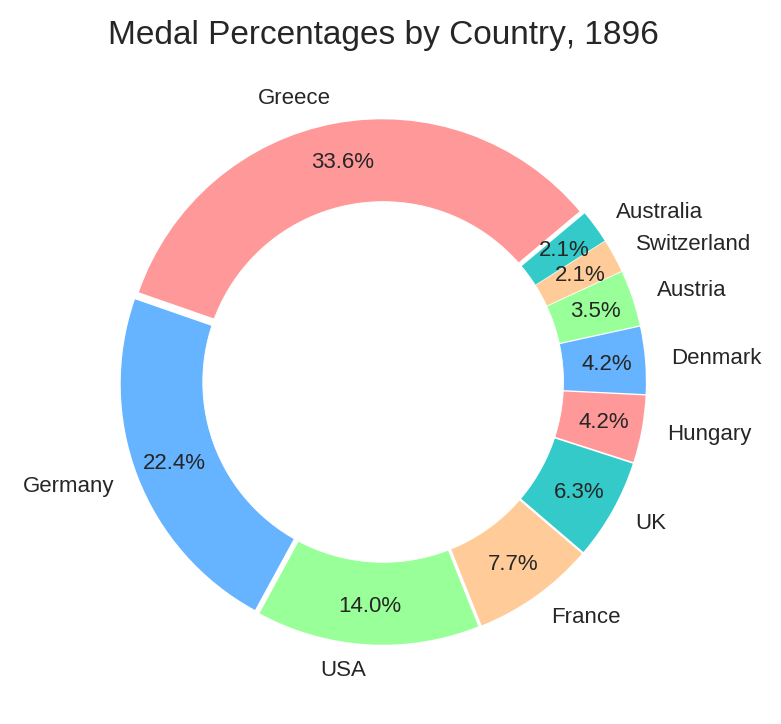

In [ ]:
fig = plt.figure(figsize=(4,4), dpi=200)
ax1 = plt.subplot(111)

labels = list(df1896_medals['region'])
explode = [0.02 for item in labels] 
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#34caca']

df1896_medals['Total Medals'].plot(kind='pie', explode = explode, labels = labels, colors = colors, autopct='%1.1f%%', startangle=40, fontsize=8, pctdistance=0.85)

centre_circle = plt.Circle((0,0),0.7,color='white', fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.set_title("Medal Percentages by Country, 1896")

ax1.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
df1_1948 = df[df.Year == 1948]

df1_1948.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland,NaN
42,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Team All-Around,Gold,Finland,NaN
43,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Floor Exercise,NaN,Finland,NaN


In [ ]:
df1948_medals = df1_1948.groupby('region')['Medal'].count().sort_values(ascending=False).reset_index(name='Total Medals')
df1948_medals.head(6)


,region,Total Medals
0,USA,168
1,Sweden,88
2,France,77
3,Italy,68
4,Switzerland,64
5,Hungary,64


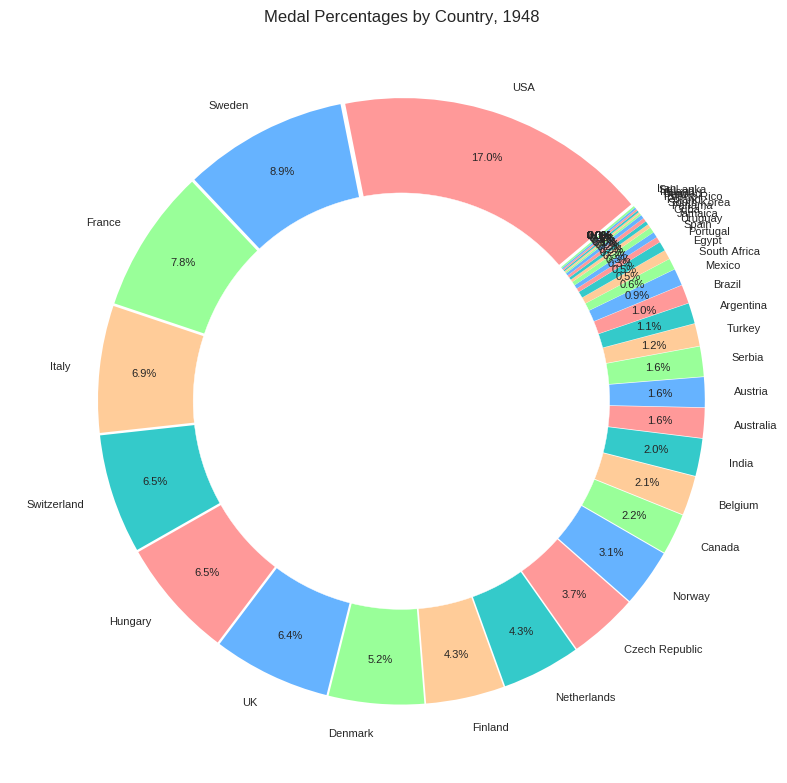

In [ ]:
fig = plt.figure(figsize=(8,8), dpi=100)
ax1 = plt.subplot(111)

labels = list(df1948_medals['region'])
explode = [0.02 for item in labels] 
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#34caca']

df1948_medals['Total Medals'].plot(kind='pie', explode = explode, labels = labels, colors = colors, autopct='%1.1f%%', startangle=40, fontsize=8, pctdistance=0.85)

centre_circle = plt.Circle((0,0),0.7,color='white', fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.set_title("Medal Percentages by Country, 1948")

ax1.axis('off')
plt.tight_layout()
plt.show()

In [ ]:
df1_2016 = df[df.Year == 2016]
#df1_2016.dropna(subset=['Medal'], inplace=True)

df1_2016.head(3)

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
80,22,Andreea Aanei,F,22.0,170.0,125.0,Romania,ROU,2016 Summer,2016,Summer,Rio de Janeiro,Weightlifting,Weightlifting Women's Super-Heavyweight,NaN,Romania,NaN
139,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Individual All-Around,NaN,Spain,NaN
140,51,Nstor Abad Sanjun,M,23.0,167.0,64.0,Spain,ESP,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Floor Exercise,NaN,Spain,NaN


In [ ]:
df2016_medals = df1_2016.groupby('region')['Medal'].count().sort_values(ascending=False).reset_index(name='Total Medals')
df2016_medals.head(6)


,region,Total Medals
0,USA,264
1,Germany,159
2,UK,145
3,Russia,115
4,China,113
5,France,96


In [ ]:
df2016_medals['Percent'] = round(100*df2016_medals['Total Medals']/(df2016_medals['Total Medals'].sum()), 2)

df2016_medals.head(2)

,region,Total Medals,Percent
0,USA,264,13.06
1,Germany,159,7.86


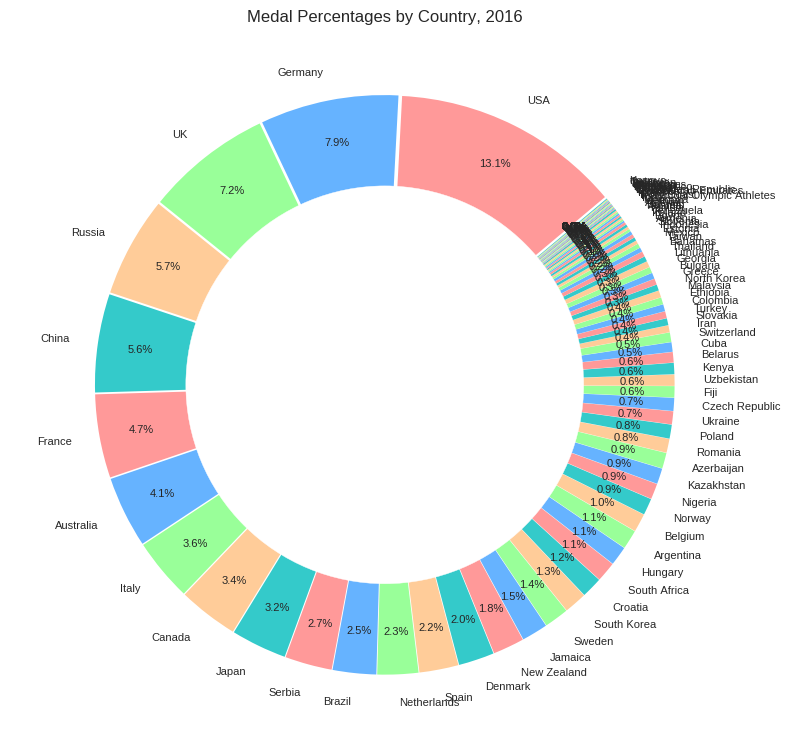

In [ ]:
fig = plt.figure(figsize=(8,8), dpi=100)
ax1 = plt.subplot(111)

labels = list(df2016_medals['region'])
explode = [0.02 for item in labels] 
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99', '#34caca']

df2016_medals['Total Medals'].plot(kind='pie', explode = explode, labels = labels, colors = colors, autopct='%1.1f%%', startangle=40, fontsize=8, pctdistance=0.85)

centre_circle = plt.Circle((0,0),0.7,color='white', fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.set_title("Medal Percentages by Country, 2016")

ax1.axis('off')
plt.tight_layout()
plt.show()

##Question 4
What variables are significant in whether or not an athlete medals? Gets a gold medal or not? Get any medal or none?
See what variables are significant in each of the individual sports.

In [ ]:
dfprem=df     # This cell covers exploratory data analysis
dfprem=dfprem.drop(columns=['ID','Name','Team','Games','City','Sport','notes','Year','Season'])
athletes = df.shape[0]     # 271,116 total athletes
dfrem=dfprem.dropna()
medalists = dfa.shape[0]     # 30,172 medalists
dfa.describe()

NameError: ignored

The youngest Olympic medalist was 13 years old while the oldest was 66 years old. Olympic medalists have an average age of 25.4 years, average height of 177.65 cm, and average weight of 73.76 kg. The historical probability of an Olympic athlete medalling is 0.11128815709 (number of medalists divided by number of athletes). Over the years, sports have been added/dropped therefore Sport and Event are not suitably testable categories; additionally, the number of medals awarded per event varies so there is inherent statistical significance (e.g. 36 medals awarded in basketball as opposed to 3 medals for many events implies a higher probability of athlete medaling if they play a sport awarding more total medals per year).

In [ ]:
dfa=df
dfa=dfa.drop(columns=['ID','Name','Team','Games','City','Sport','notes','Year','Season','Event','NOC'])
dfa['Medal'] = dfa['Medal'].map({'Bronze':1,'Silver':1,'Gold':1})
dfa['Sex'] = dfa['Sex'].map({'M':1,'F':0})
dfa=dfa.dropna(subset=['Sex'])
dfa=dfa.dropna(subset=['Height'])
dfa=dfa.dropna(subset=['Weight'])
dfa=dfa.dropna(subset=['region'])
dfa=dfa.fillna(0)
dfa

dfa is the dataframe of Olympic athletes containing their sex, age, height, weight, and country of representation. The "Medal" column is mapped so medalists have a value of 1 and nonmedalists have a value of 0. The 'Sex' column is mapped this way for M and F, respectively. This fits the specifications of the first part of Question 4.

In [ ]:
dfb=df
dfb=dfb.drop(columns=['ID','Name','Team','Games','City','Sport','notes','Year','Season','Event','NOC'])
dfb['Medal'] = dfb['Medal'].map({'Bronze':0,'Silver':0,'Gold':1})
dfb['Sex'] = dfb['Sex'].map({'M':1,'F':0})
dfb=dfb.dropna(subset=['Sex'])
dfb=dfb.dropna(subset=['Height'])
dfb=dfb.dropna(subset=['Weight'])
dfb=dfb.dropna(subset=['region'])
dfb=dfb.fillna(0)
dfb.head(3)

dfb is the dataframe of Olympic athletes containing their sex, age, height, weight, and country of representation. The "Medal" column is mapped so gold medalists have a value of 1 and non-gold-medalists have a value of 0. The 'Sex' column is mapped this way for M and F, respectively. This fits the specifications of the second part of Question 4.

In [ ]:
atestsex = dfa[['Sex','Medal']]
asexcorr = atestsex.corr()
asexcorr

Given that the data ranges from 1896, it is clear that sex was a poor category to test. Many of the events in which women participate were added at a later date than the equivalent male event thus the total number of medals is skewed by an unfactored confounding variable. The ".corr" method computes the Pearson 'r' (coefficient of correlation). As the absolute value of our computed correlation coefficient is approximately 0.018, the two variables are minimally correlated and Sex is not statistically significant to whether an athlete medals.

In [ ]:
atestage = dfa[['Age','Medal']]
aagecorr = atestage.corr()
aagecorr

As the absolute value of our computed correlation coefficient is approximately 0.032, the two variables are minimally correlated and Age is not statistically significant to whether an athlete medals.

In [ ]:
atestheight = dfa[['Height','Medal']]
aheightcorr = atestheight.corr()
aheightcorr

As the absolute value of our computed correlation coefficient is approximately 0.089, the two variables are minimally correlated and Height is not statistically significant to whether an athlete medals.

In [ ]:
atestweight = dfa[['Weight','Medal']]
aweightcorr = atestweight.corr()
aweightcorr

As the absolute value of our computed correlation coefficient is approximately 0.089, the two variables are minimally correlated and Height is not statistically significant to whether an athlete medals. Note that the correlation coefficient for Height and Medal is very close to the Weight and Medal correlation. This could be due to body proportionality of the majority of the athletes (extremely health BMIs).

In [ ]:
btestsex = dfa[['Sex','Medal']]
bsexcorr = btestsex.corr()

btestage = dfa[['Age','Medal']]
bagecorr = btestage.corr()

btestheight = dfa[['Height','Medal']]
bheightcorr = btestheight.corr()

btestweight = dfa[['Weight','Medal']]
bweightcorr = btestweight.corr()

bsexcorr
bagecorr
bheightcorr
bweightcorr

In [ ]:
bweightcorr

After testing the dfb dataframe as we tested dfa, the findings were the same. Age, height, weight, and sex are not statistically significant to whether an athlete medals or gets a gold medal.

In [ ]:
dfc=df
dfc.unique.name
#dfc=dfc.drop(columns=['ID','Name','Team','Games','City','Sport','notes','Year','Season','Event','NOC'])
#dfa['Medal'] = dfa['Medal'].map({'Bronze':1,'Silver':1,'Gold':1})
#dfa['Sex'] = dfa['Sex'].map({'M':1,'F':0})
#dfa=dfa.dropna(subset=['Sex'])
#dfa=dfa.dropna(subset=['Height'])
#dfa=dfa.dropna(subset=['Weight'])
#dfa=dfa.dropna(subset=['region'])
#dfa=dfa.fillna(0)
#dfa

## Question 5

In [ ]:
# athlete_dat.isna() a lot of NA is medal categories -- thats fine
athlete_dat['Medal'].unique() # Gold, Bronze Silver 
athlete_dat['Sex'].unique() # M, F

In [ ]:
athlete_dat.describe(include = ['O'])

## Group by sex and name, count medals and only conserve the top ten from each gender for future plot data

In [ ]:
##group by name and sex and count the number of medals each person has gotten
genderNamegroup = athlete_dat.groupby(['Sex','Name'])['Medal'].count().reset_index() #reset index converts it back to a dataframe
genderNamegroup.head()

genderNamegroup['Medal'] = pd.to_numeric(genderNamegroup['Medal']) #so can sort in dataframe -- needs to be numeric

##parse out top ten females who have medaled
plot1 = genderNamegroup[(genderNamegroup['Sex'] == "F") & (genderNamegroup['Medal'] != 0)].sort_values('Medal', ascending = False)
plot1 = plot1.nlargest(10,'Medal')
plot1.head(2)

In [ ]:
##parse out top ten males who've medaled
plot1a = genderNamegroup[(genderNamegroup['Sex'] == "M") & (genderNamegroup['Medal'] != 0)].sort_values('Medal', ascending = False)
plot1a = plot1a.nlargest(10,'Medal')
plot1a
##cobmine top male and female
plot1 = plot1.append(plot1a) #if this command run twice start getting duplicates
plot1.head(3)


## Exploring top medalers/ Conditions

In [ ]:
genderGroupEvents = athlete_dat.groupby('Sex')['Event'].count()
genderGroupEvents


### Add on number of events of top medalers and last year they medaled to plot data and make final dataframe called medalers_summary

In [ ]:
top_medalers = plot1['Name']
medalers_events = athlete_dat[athlete_dat['Name'].isin(top_medalers)].groupby('Name')['Event'].count().reset_index()
medalers_events.head(3)

In [ ]:
medalers_year = athlete_dat[athlete_dat['Name'].isin(top_medalers)].groupby('Name')['Year'].max().reset_index()
medalers_year.head(3)

In [ ]:
plot1_merge1 = pd.merge(plot1,medalers_events, on = 'Name')
medalers_summary = pd.merge(plot1_merge1, medalers_year, on= 'Name')
medalers_summary.head(3)

### Change event column name to events_competed_in and add a Medaling_Percentage colum

In [ ]:
medalers_summary.rename(columns = {'Event':'Events_competed_in'}, inplace = True)
medalers_summary
medalers_summary['Medaling_Percentage'] = medalers_summary['Medal']/medalers_summary['Events_competed_in']
medalers_summary.head(9)

## Plotting for question 5
### will be total medals colored by gender, medaling percentage, and  scatter plot of total medals/ year attained

In [ ]:
plot1 = plot1.sort_values('Medal', ascending = False)
plt.bar(plot1[plot1['Sex']=='M']['Name'],plot1[plot1['Sex']=='M']['Medal'], color = '#5674af', label = "Men")
plt.bar(plot1[plot1['Sex']=='F']['Name'],plot1[plot1['Sex']=='F']['Medal'], color = '#a85986', label = "Women")


plt.xticks(rotation=90)
plt.title('Top 20 Olympic Medalers')
plt.ylabel('Medals Won')
plt.legend()


In [ ]:
medalers_summary = medalers_summary.sort_values('Medal', ascending = False)
plt.bar(medalers_summary[medalers_summary['Sex']=='M']['Name'],medalers_summary[medalers_summary['Sex']=='M']['Medaling_Percentage']*100, color = '#5674af', label = 'Men')
plt.bar(medalers_summary[medalers_summary['Sex']=='F']['Name'],medalers_summary[medalers_summary['Sex']=='F']['Medaling_Percentage']*100, color = '#a85986', label = 'Women')


plt.xticks(rotation=90)
plt.title("Top 20 Olympic Medalers' Medaling Percentage")
plt.ylabel('% of Events Won')
plt.legend()

In [ ]:
cmap = {'F': '#a85986', 'M': '#5674af'}
colors = medalers_summary['Sex'].apply(lambda x: cmap[x])

plt.scatter(medalers_summary['Year'], medalers_summary['Medal'], c = colors, s=300, alpha = .8)
plt.title("Top 20 Olypmic Medalers' Achievements Through Time")
plt.xlabel("Date of Last Medal Won")
plt.ylabel("Number of Medals Won")


In [ ]:
name_year = athlete_dat.groupby(['Name'])['Year'].max().reset_index()
name_medal_count = athlete_dat.groupby(['Sex','Name'])['Medal'].count().reset_index()
medal_year_summary = pd.merge(name_year, name_medal_count, on='Name', how='left')
medal_year_summary.head(3)




In [ ]:
plot2 = medal_year_summary[(medal_year_summary['Medal'] > 5)]
cmap = {'F': '#a85986', 'M': '#5674af'}
colors = plot2['Sex'].apply(lambda x: cmap[x])

plt.scatter(plot2['Year'], plot2['Medal'], c = colors, s=80, alpha = .8)
plt.title("Olypmic Medal Achievements Through Time")
plt.xlabel("Date of Last Medal Won")
plt.ylabel("Number of Medals Won")

In [ ]:
plot2 = medal_year_summary[(medal_year_summary['Medal'] > 5)]
cmap = {'F': '#a85986', 'M': '#5674af'}

men_data = plot2[plot2['Sex']=='M']